In [1]:
import requests # library to handle requests
import random # library for random number generation
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

import requests # library to handle requests
from pandas import DataFrame
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
! python -m pip --version
! pip install lxml html5lib beautifulsoup4

pip 19.1.1 from /home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pip (python 3.6)
     |████████████████████████████████| 5.5MB 5.6MB/s eta 0:00:01     |██████████████████▊             | 3.2MB 5.6MB/s eta 0:00:01
     |████████████████████████████████| 122kB 33.4MB/s eta 0:00:01


In [3]:
link = 'https://en.wikipedia.org/wiki/Postal_codes_in_Singapore'  #extract table from wikipedia for district info
df1 = pd.read_html(link, match = 'Postal district')
print(f'Total tables: {len(df1)}')
df1 = df1[0]

Total tables: 1


In [4]:
df1.head()

,Postal district,Postal sector(1st 2 digits of 6-digit postal codes),General location
0,1,"01, 02, 03, 04, 05, 06","Raffles Place, Cecil, Marina, People's Park"
1,2,"07, 08","Anson, Tanjong Pagar"
2,3,"14, 15, 16","Bukit Merah, Queenstown, Tiong Bahru"
3,4,"09, 10","Telok Blangah, Harbourfront"
4,5,"11, 12, 13","Pasir Panjang, Hong Leong Garden, Clementi New..."


In [5]:
rentaldf = pd.read_csv("rentals-of-non-landed-residential-buildings.csv")
rentaldf.head()

,qtr,project_name,postal_district,25th_percentile,median,75th_percentile,rental_contracts
0,2020-Q3,# 1 SUITES,14,3.22,3.57,3.61,13
1,2020-Q3,18 WOODSVILLE,13,3.28,3.69,4.04,17
2,2020-Q3,1919,9,4.71,4.91,5.00,13
3,2020-Q3,26 NEWTON,11,4.29,4.80,4.99,20
4,2020-Q3,368 THOMSON,11,3.18,3.33,3.44,20


In [6]:
rentaldf = rentaldf.rename(columns={'postal_district': 'Postal district'})
rentaldf.head()

,qtr,project_name,Postal district,25th_percentile,median,75th_percentile,rental_contracts
0,2020-Q3,# 1 SUITES,14,3.22,3.57,3.61,13
1,2020-Q3,18 WOODSVILLE,13,3.28,3.69,4.04,17
2,2020-Q3,1919,9,4.71,4.91,5.00,13
3,2020-Q3,26 NEWTON,11,4.29,4.80,4.99,20
4,2020-Q3,368 THOMSON,11,3.18,3.33,3.44,20


In [7]:
df = rentaldf.join(df1.set_index('Postal district'), on='Postal district') #Combine the two datasets into one
df.head()

,qtr,project_name,Postal district,25th_percentile,median,75th_percentile,rental_contracts,Postal sector(1st 2 digits of 6-digit postal codes),General location
0,2020-Q3,# 1 SUITES,14,3.22,3.57,3.61,13,"38, 39, 40, 41","Geylang, Eunos, Aljunied"
1,2020-Q3,18 WOODSVILLE,13,3.28,3.69,4.04,17,"34, 35, 36, 37","Macpherson, Braddell, Potong Pasir, Bidadari"
2,2020-Q3,1919,9,4.71,4.91,5.00,13,"22, 23","Orchard, Cairnhill, River Valley"
3,2020-Q3,26 NEWTON,11,4.29,4.80,4.99,20,"28, 29, 30","Watten Estate, Novena, Thomson"
4,2020-Q3,368 THOMSON,11,3.18,3.33,3.44,20,"28, 29, 30","Watten Estate, Novena, Thomson"


In [8]:
df.drop(columns=['25th_percentile', '75th_percentile', 'qtr', 'Postal sector(1st 2 digits of 6-digit postal codes)'], inplace=True)


In [9]:
df.head()

,project_name,Postal district,median,rental_contracts,General location
0,# 1 SUITES,14,3.57,13,"Geylang, Eunos, Aljunied"
1,18 WOODSVILLE,13,3.69,17,"Macpherson, Braddell, Potong Pasir, Bidadari"
2,1919,9,4.91,13,"Orchard, Cairnhill, River Valley"
3,26 NEWTON,11,4.80,20,"Watten Estate, Novena, Thomson"
4,368 THOMSON,11,3.33,20,"Watten Estate, Novena, Thomson"


# Visualisation of Data
### We shall visualise our data to gain insights

#### Let us first view the spread of the median price/sqft in our dataset

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

count, bin_edges = np.histogram(df['median'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[ 65 172 159 145  75  36  12   6   0   1]
[1.53  2.187 2.844 3.501 4.158 4.815 5.472 6.129 6.786 7.443 8.1  ]


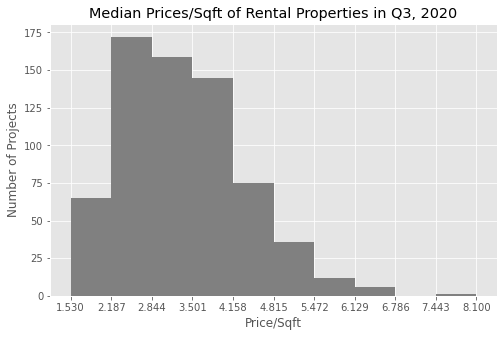

In [11]:
df['median'].plot(kind='hist', figsize=(8, 5), color='grey', xticks=bin_edges)

plt.title('Median Prices/Sqft of Rental Properties in Q3, 2020') # add a title to the histogram
plt.ylabel('Number of Projects') # add y-label
plt.xlabel('Price/Sqft') # add x-label

plt.show()

### We can see that many of the projects are in the 2-4 price/sqft range.

<AxesSubplot:xlabel='Postal district', ylabel='median'>

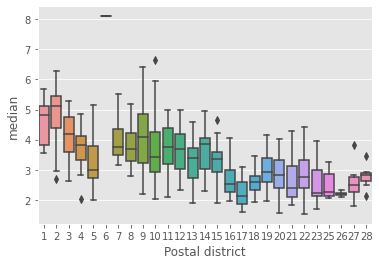

In [12]:
import seaborn as sns
sns.boxplot(x="Postal district", y="median", data=df) 

In [40]:
df_group_one = df.groupby(['Postal district'],as_index=False).mean()
top8cheapest = df_group_one.sort_values('median', ascending=True).head(n=8) #Let us get the top 8 most affordable districts 
top8cheapest

,Postal district,median,rental_contracts
16,17,2.199231,26.923077
24,26,2.205000,18.750000
23,25,2.512000,34.800000
22,23,2.538919,26.216216
25,27,2.560000,27.545455
20,21,2.605000,22.968750
17,18,2.622917,39.500000
15,16,2.692222,39.074074


In [48]:
gym_geo = r'gyms-sg-geojson.geojson' #geojson file of Gyms in singapore
    
sg_map = folium.Map(location=[1.3521, 103.8198], zoom_start=12)

folium.GeoJson(gym_geo, name="geojson").add_to(sg_map)

sg_map

In [49]:
df2 = df1[['Postal district', 'General location']]
cheaperdistricts = top8cheapest.join(df2.set_index('Postal district'), on='Postal district')
cheaperdistricts.reset_index(drop=True, inplace=True)
cheaperdistricts

#The dataframe shows the top 8 cheapest districts, with its general location

,Postal district,median,rental_contracts,General location
0,17,2.199231,26.923077,"Loyang, Changi"
1,26,2.205000,18.750000,"Upper Thomson, Springleaf"
2,25,2.512000,34.800000,"Kranji, Woodgrove, Woodlands"
3,23,2.538919,26.216216,"Hillview, Dairy Farm, Bukit Panjang, Choa Chu ..."
4,27,2.560000,27.545455,"Yishun, Sembawang, Senoko"
5,21,2.605000,22.968750,"Upper Bukit Timah, Clementi Park, Ulu Pandan"
6,18,2.622917,39.500000,"Simei, Tampines, Pasir Ris"
7,16,2.692222,39.074074,"Bedok, Upper East Coast, Eastwood, Kew Drive"


### We can see a comparison from the map and the locations of the cheapest districts, that
#### - district 17 has no gyms nearby
#### - district 26 has 3 gyms around 'Upper Thomson'
#### - district 25 has 2 gyms at the centre of 'woodlands' and district 23 has 3 gyms spread out across a large area
#### - district 27 only has 1 gym 

### Thus, Harambe has decided to explore the area around 'Upper Thomson' 

In [52]:
!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from IPython.display import Image 
from IPython.core.display import HTML 

     |████████████████████████████████| 112kB 9.6MB/s eta 0:00:01


In [56]:
CLIENT_ID = 'F2T43INILG3LKJY21KH3NNHRYUQBPRIYNKDQHVMVLAXICDM3' # your Foursquare ID
CLIENT_SECRET = 'DFALSAO3PJCU5U3LN0C5LMKN4MQ3RGHVKPQLMWEMZR3ALHJK' # your Foursquare Secret
ACCESS_TOKEN = 'BGTSAPUL231FCWI5FGDHLZPKINF4Q0UZUYIEQJUSPYZU4HHN' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
radius = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: F2T43INILG3LKJY21KH3NNHRYUQBPRIYNKDQHVMVLAXICDM3
CLIENT_SECRET:DFALSAO3PJCU5U3LN0C5LMKN4MQ3RGHVKPQLMWEMZR3ALHJK


In [57]:
address = 'Upper Thomson, Springleaf, Singapore'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

1.3988284 103.8180618


In [58]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=F2T43INILG3LKJY21KH3NNHRYUQBPRIYNKDQHVMVLAXICDM3&client_secret=DFALSAO3PJCU5U3LN0C5LMKN4MQ3RGHVKPQLMWEMZR3ALHJK&ll=1.3988284,103.8180618&v=20180604&radius=500&limit=30'

In [59]:
results = requests.get(url).json()
'There are {} venues around Thomson, Springleaf Singapore.'.format(len(results['response']['groups'][0]['items']))

'There are 20 venues around Thomson, Springleaf Singapore.'

In [60]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '51616da9e4b0e63c799f73f5',
  'name': 'Thai Hao Chi Traditional Thai Charcoal Steamboat 泰好吃',
  'location': {'address': '908H Upper Thomson Road',
   'lat': 1.39830198866359,
   'lng': 103.81824306757062,
   'labeledLatLngs': [{'label': 'display',
     'lat': 1.39830198866359,
     'lng': 103.81824306757062}],
   'distance': 61,
   'postalCode': '787111',
   'cc': 'SG',
   'neighborhood': 'Upper Thomson',
   'city': 'Singapore',
   'country': 'Singapore',
   'formattedAddress': ['908H Upper Thomson Road', '787111', 'Singapore']},
  'categories': [{'id': '4bf58dd8d48988d149941735',
    'name': 'Thai Restaurant',
    'pluralName': 'Thai Restaurants',
    'shortName': 'Thai',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/thai_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups':

In [62]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
#Define function to get category type

In [63]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,neighborhood,city,country,formattedAddress,crossStreet,id
0,Thai Hao Chi Traditional Thai Charcoal Steambo...,Thai Restaurant,908H Upper Thomson Road,1.398302,103.818243,"[{'label': 'display', 'lat': 1.39830198866359,...",61,787111,SG,Upper Thomson,Singapore,Singapore,"[908H Upper Thomson Road, 787111, Singapore]",NaN,51616da9e4b0e63c799f73f5
1,Mookata,Thai Restaurant,908 Upper Thomson Road,1.398459,103.818178,"[{'label': 'display', 'lat': 1.398459, 'lng': ...",43,NaN,SG,NaN,Singapore,Singapore,"[908 Upper Thomson Road, Singapore]",NaN,54e08bc0498ec2e50ab10199
2,Springleaf Prata Place,Indian Restaurant,1 Thong Soon Ave,1.396933,103.818609,"[{'label': 'display', 'lat': 1.396932726962341...",219,787431,SG,Yishun,Singapore,Singapore,"[1 Thong Soon Ave (Springleaf Garden), 787431,...",Springleaf Garden,4b809cdcf964a520fc8030e3
3,Soon Kee Duck Rice Eating House 顺记餐室,Chinese Restaurant,908H Upper Thomson Rd,1.398134,103.818400,"[{'label': 'display', 'lat': 1.398134334236453...",85,787111,SG,NaN,Singapore,Singapore,"[908H Upper Thomson Rd (Thong Soon Rd), 787111...",Thong Soon Rd,4ce35e5d748d6ea85aafca50
4,Verdure,Café,"#01-02, Springleaf Nature Park",1.400928,103.817582,"[{'label': 'display', 'lat': 1.400928362293327...",239,787129,SG,Yishun,Singapore,Singapore,"[#01-02, Springleaf Nature Park (1218 Upper Th...",1218 Upper Thomson Road,563d4fb7cd10d06cdeda2e95
5,Meera's Curry Banana Leaf Restaurant,Indian Restaurant,910B Upper Thomson Road,1.398545,103.818142,"[{'label': 'display', 'lat': 1.398544686330152...",32,NaN,SG,NaN,Singapore,Singapore,"[910B Upper Thomson Road, Singapore]",NaN,4bb40b2f9af3b713e1f28b28
6,7-Eleven,Convenience Store,Thong Soon Street,1.398803,103.818125,"[{'label': 'display', 'lat': 1.398803270082417...",7,NaN,SG,NaN,Singapore,Singapore,"[Thong Soon Street, Singapore]",NaN,4bc021862a89ef3ba435f088
7,Hans Café & Cake House,Café,906A Upper Thomson Rd.,1.397376,103.818582,"[{'label': 'display', 'lat': 1.397375749135722...",171,787110,SG,Yishun,Singapore,Singapore,"[906A Upper Thomson Rd. (Springfield Garden), ...",Springfield Garden,4b6685f5f964a52041232be3
8,The Famous Kitchen,Chinese Restaurant,54 Sembawang Rd,1.402714,103.817821,"[{'label': 'display', 'lat': 1.402713975732315...",433,NaN,SG,NaN,Singapore,Singapore,"[54 Sembawang Rd (Hong Heng Mansions), Singapore]",Hong Heng Mansions,4dfb3b59aeb7e41abbdeafac
9,Leesonn Supermarket,Supermarket,NaN,1.397329,103.818527,"[{'label': 'display', 'lat': 1.397328923964714...",174,NaN,SG,NaN,NaN,Singapore,[Singapore],NaN,4d58a4dbafe4b60c0a695361


In [64]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Upper Thomson, Springleaf


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Ecco',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

In [65]:
# define URL
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '60225244df2c8a58fb1ef6f8'},
 'response': {'venues': []}}

In [66]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [67]:
trending_venues_df

'No trending venues are available at the moment!'

## Looks like there are no trending venues around the area, however there are quite a few eateries, which is pleasant.

# Thanks to the data visualisation, analysis and foursquare API done, Harambe has decided on a place to stay in Singapore according to his preferences. :) 